## Dataset Information

### Source
The Global Health Observatory (GHO) data repository under the World Health Organization (WHO) tracks the health status and various related factors for all countries. The datasets are publicly available for health data analysis. The dataset related to life expectancy and health factors for 193 countries has been collected from the WHO data repository, while corresponding economic data was sourced from the United Nations website.

### Data Selection and Time Frame
Among all categories of health-related factors, only the most critical and representative factors were chosen. Over the past 15 years, significant developments in the health sector have led to improvements in human mortality rates, particularly in developing nations, compared to the past 30 years. Therefore, this project considers data from the years 2000-2015 for 193 countries for further analysis.

### Data Merging and Initial Inspection
The individual data files were merged into a single dataset. An initial visual inspection revealed some missing values. Since the datasets originated from WHO, no evident errors were found. Missing data was handled in R software using the `Missmap` command. The results indicated that most missing data pertained to Population, Hepatitis B, and GDP.

### Handling Missing Data
The missing data were predominantly from less-known countries such as Vanuatu, Tonga, Togo, and Cabo Verde. Due to the difficulty of obtaining complete data for these countries, it was decided to exclude them from the final model dataset.

### Final Dataset Composition
The final merged dataset consists of:
- **22 Columns**
- **2938 Rows**
- **20 Predicting Variables**

### Categories of Predicting Variables
The predicting variables were categorized into broad groups:
- **Immunization-related factors**
- **Mortality factors**
- **Economic factors**
- **Social factors**

In [ ]:
import numpy as np
import pandas as pd
import scipy 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("./archive/Life_Expectancy_Data.csv")

In [ ]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

<Axes: >

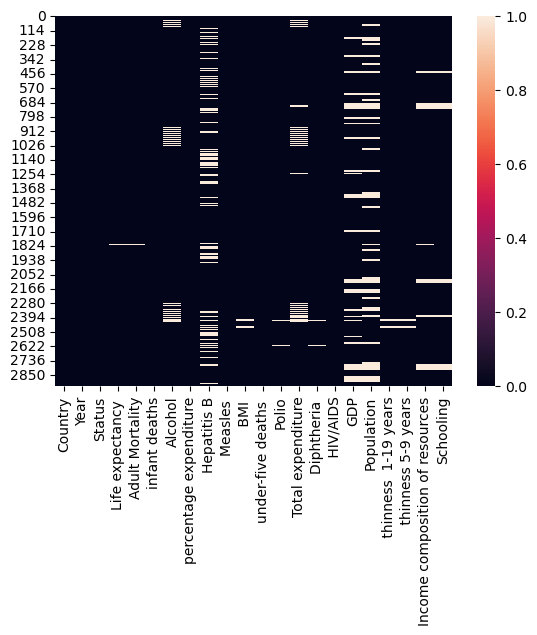

In [ ]:
sns.heatmap(data.isnull())
#This plot highlights the null values.

In [ ]:
null_df = data.isnull().sum().reset_index()
null_df.columns = ['Feature name', 'no. of Nan']
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,10
4,Adult Mortality,10
5,infant deaths,0
6,Alcohol,194
7,percentage expenditure,0
8,Hepatitis B,553
9,Measles,0


In [ ]:
#Life Expectancy and Adult Mortality are continous features, so we are filling the null values with their mean values.
data['Life expectancy '] = data['Life expectancy '].fillna(data['Life expectancy '].mean())
data['Adult Mortality'] = data['Adult Mortality'].fillna(data['Adult Mortality'].mean())

In [ ]:
numeric_data = data.select_dtypes(include=['number'])

In [ ]:
corr = numeric_data.corr()
corr

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.169623,-0.078861,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.169623,1.000000,-0.696359,-0.196535,0.404029,0.381791,0.255760,-0.157574,0.564466,-0.222503,0.464531,0.216373,0.478465,-0.556457,0.461393,-0.021548,-0.476561,-0.470977,0.724631,0.748263
Adult Mortality,-0.078861,-0.696359,1.000000,0.078747,-0.195454,-0.242814,-0.161828,0.031174,-0.384806,0.094135,-0.274218,-0.114355,-0.274540,0.523727,-0.296019,-0.013639,0.302501,0.308053,-0.457530,-0.452380
infant deaths,-0.037415,-0.196535,0.078747,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404029,-0.195454,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381791,-0.242814,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.255760,-0.161828,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157574,0.031174,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.564466,-0.384806,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222503,0.094135,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


<Axes: >

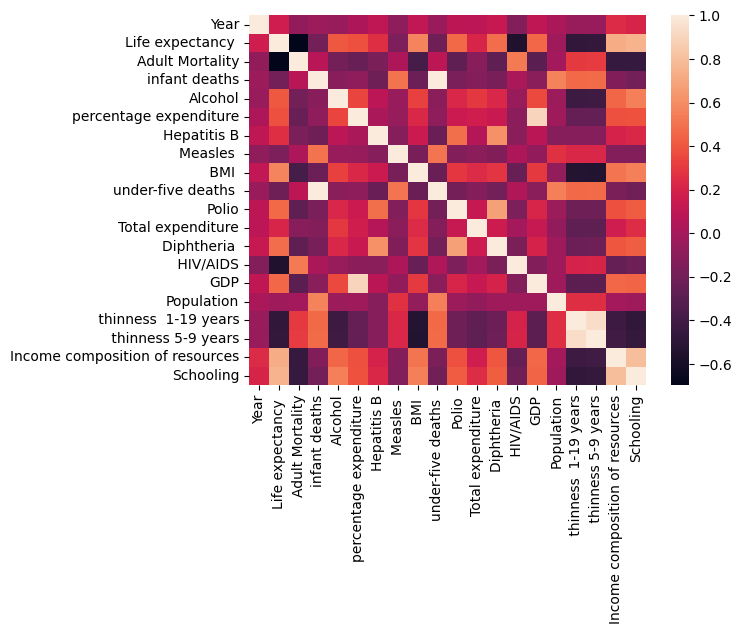

In [ ]:
sns.heatmap(corr)

## Imputing Missing Data

<Axes: xlabel='Schooling', ylabel='Alcohol'>

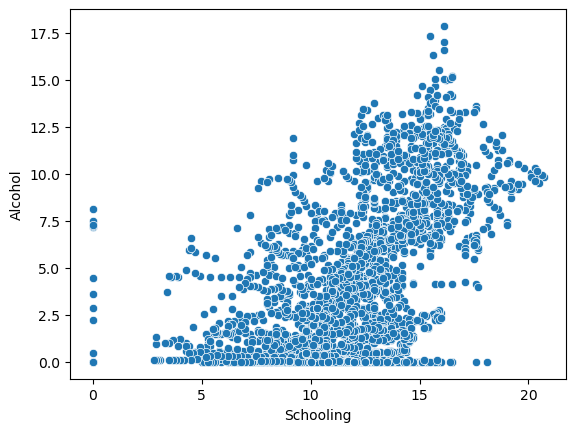

In [57]:
#Alcohol feature correlates with schooling
sns.scatterplot(x = data["Schooling"], y = data["Alcohol"])

In [63]:
ranges = [0, 2.5, 5, 7.5, 10, 15, float('inf')]
labels = ['0-2.5', '2.5-5', '5-7.5', '7.5-10', '10-15', '15+']

sc_range = pd.cut(data['Schooling'], bins=ranges, labels=labels, right=False)

result = data.groupby(sc_range)['Alcohol'].mean()

result

C:\Users\paart\AppData\Local\Temp\ipykernel_2672\656873969.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = data.groupby(sc_range)['Alcohol'].mean()


Schooling
0-2.5     3.433529
2.5-5     1.731087
5-7.5     1.314107
7.5-10    2.402618
10-15     4.084568
15+       8.914029
Name: Alcohol, dtype: float64

In [69]:
def impute_alcohol(cols):
    alcohol = cols[0]
    sc = cols[1]
    if pd.isnull(alcohol):
        if sc <= 2.5:
            return 3.5
        elif 2.5<sc<5:
            return 1.75
        elif 5<sc<=7.5:
            return 1.3
        elif 7.5<sc<=10:
            return 2.5
        elif 10<sc<=15:
            return 4
        else:
            return 9
    else:
        return alcohol
data['Alcohol']=data[['Alcohol','Schooling']].apply(impute_alcohol,axis=1)

C:\Users\paart\AppData\Local\Temp\ipykernel_2672\2495180030.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alcohol = cols[0]
C:\Users\paart\AppData\Local\Temp\ipykernel_2672\2495180030.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sc = cols[1]


In [75]:
data['Alcohol']=data['Alcohol'].fillna(value=data['Alcohol'].mean())

C:\Users\paart\AppData\Local\Temp\ipykernel_2672\988408026.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Alcohol']);
C:\Users\paart\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


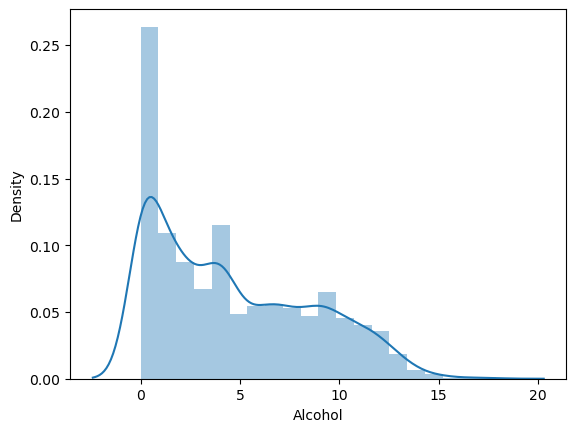

In [77]:
sns.distplot(data['Alcohol']);

In [79]:
scipy.stats.skew(data['Alcohol'],axis=0)

0.5903807968147069

In [93]:
# Now we have to impute 'Hepatatis B' which highly correlates with 'Diptheria', but both of them have null values in the same zone.
# If we want to impute 'Diptheria' first with highly correlated feature 'Polio' then that again would be of no use because it has again the same problem of null values in same Zone.
# But we have an option of imputing 'Polio' feature with the 'Life expactancy' which nicely correlates with it. 

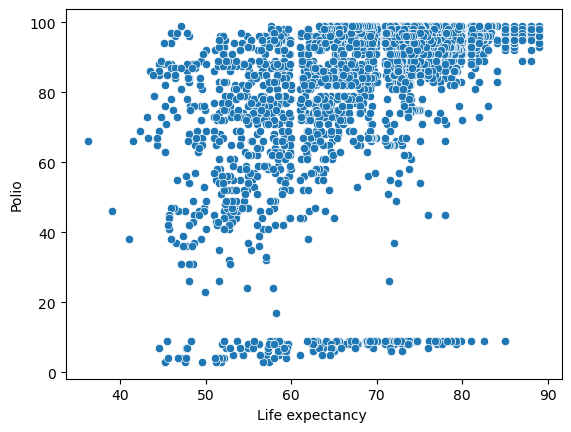

In [95]:
sns.scatterplot(x=data['Life expectancy '],y=data['Polio']);

In [91]:
def impute_polio(c):
    p=c[0]
    l=c[1]
    if pd.isnull(p):
        if l<=45:
            return 80.0
        elif 45<l<=50:
            return 67.0
        elif 50<l<=60:
            return 87.44
        elif 60<l<=70:
            return 91
        elif 70<l<=80:
            return 94.3
        elif l>80:
            return 95
    else:
        return p
    
data['Polio']=data[['Polio','Life expectancy ']].apply(impute_polio,axis=1)

C:\Users\paart\AppData\Local\Temp\ipykernel_2672\635385092.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p=c[0]
C:\Users\paart\AppData\Local\Temp\ipykernel_2672\635385092.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  l=c[1]


In [87]:
null_df = data.isnull().sum().reset_index()
null_df.columns = ['Feature name', 'no. of Nan']
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,553
9,Measles,0


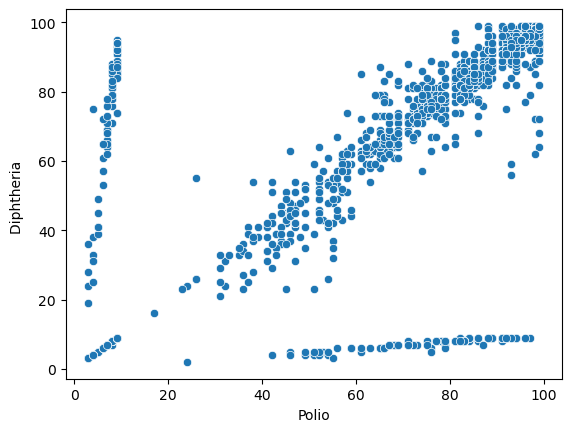

In [89]:
sns.scatterplot(x=data['Polio'],y=data['Diphtheria ']);

In [97]:
def impute_Diptheria(c):
    d=c[0]
    p=c[1]
    if pd.isnull(d):
        if p<=10:
            return 75.0
        elif 10<p<=40:
            return 37.0
        elif 40<p<=45:
            return 40.0
        elif 45<p<=50:
            return 50.0
        elif 50<p<=60:
            return 55.0
        elif 60<p<=80:
            return 65.0
        elif p>80:
            return 90.0
    else:
        return d
data['Diphtheria ']=data[['Diphtheria ','Polio']].apply(impute_Diptheria,axis=1)

C:\Users\paart\AppData\Local\Temp\ipykernel_2672\3739635203.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d=c[0]
C:\Users\paart\AppData\Local\Temp\ipykernel_2672\3739635203.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p=c[1]


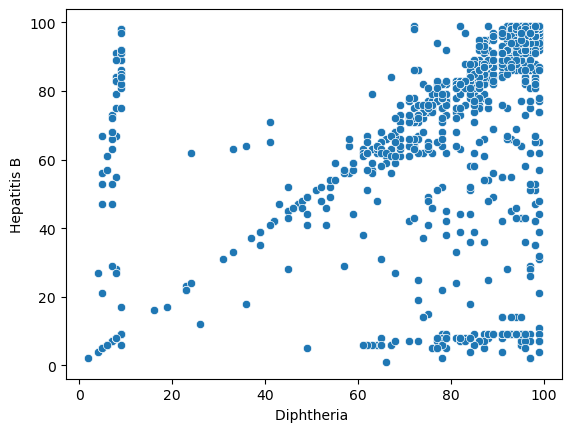

In [99]:
sns.scatterplot(x=data['Diphtheria '],y=data['Hepatitis B']);

In [101]:
def impute_HepatatisB(cols):
    hep=cols[0]
    dip=cols[1]
    if pd.isnull(hep):
        if dip<=15:
            return 75.0
        elif 15<dip<=30:
            return 20.0
        elif 30<dip<=45:
            return 38.0
        elif 45<dip<=60:
            return 43.0
        elif 60<dip<=80:
            return 63.0
        elif dip>80:
            return 88.4
    else:
        return hep
    
data['Hepatitis B']=data[['Hepatitis B','Diphtheria ']].apply(impute_HepatatisB,axis=1)

C:\Users\paart\AppData\Local\Temp\ipykernel_2672\3999999936.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hep=cols[0]
C:\Users\paart\AppData\Local\Temp\ipykernel_2672\3999999936.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dip=cols[1]


In [105]:
null_df = data.isnull().sum().reset_index()
null_df.columns = ['Feature name', 'no. of Nan']
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,0
9,Measles,0


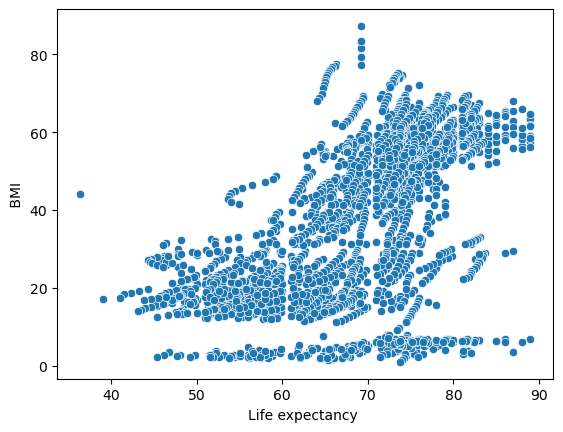

In [107]:
sns.scatterplot(x=data['Life expectancy '],y=data[' BMI ']);

In [109]:
def impute_BMI(c):
    b=c[0]
    l=c[1]
    if pd.isnull(b):
        if l<=50:
            return 25.0
        elif 50<l<=60:
            return 25.0
        elif 60<l<=70:
            return 32.0
        elif 70<l<=80:
            return 46.8
        elif 80<l<=100:
            return 60.0
    else:
        return b
    
data[' BMI ']=data[[' BMI ','Life expectancy ']].apply(impute_BMI,axis=1)

C:\Users\paart\AppData\Local\Temp\ipykernel_2672\2941873106.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b=c[0]
C:\Users\paart\AppData\Local\Temp\ipykernel_2672\2941873106.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  l=c[1]


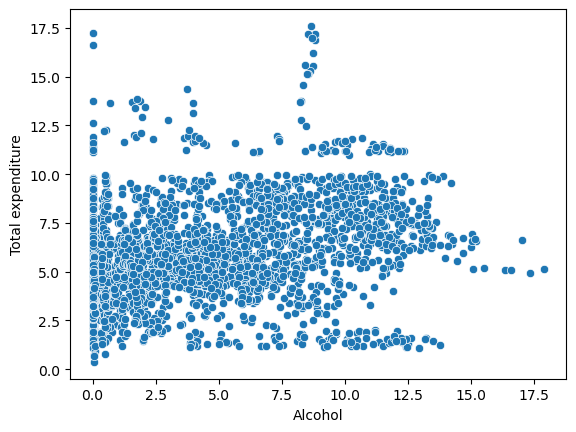

In [111]:
sns.scatterplot(y=data['Total expenditure'],x=data['Alcohol']);

In [113]:
def impute_Total_exp(c):
    t=c[0]
    a=c[1]
    if pd.isnull(t):
        if a<=2.5:
            return 5.08
        elif 2.5<a<=5.0:
            return 6.0
        elif 5.0<a<=10.0:
            return 6.71
        elif 10.0<a<=12.5:
            return 6.9
        elif a>12.5:
            return 6.68
    else:
        return t
    
data['Total expenditure']=data[['Total expenditure','Alcohol']].apply(impute_Total_exp,axis=1) 

C:\Users\paart\AppData\Local\Temp\ipykernel_2672\71518943.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t=c[0]
C:\Users\paart\AppData\Local\Temp\ipykernel_2672\71518943.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a=c[1]


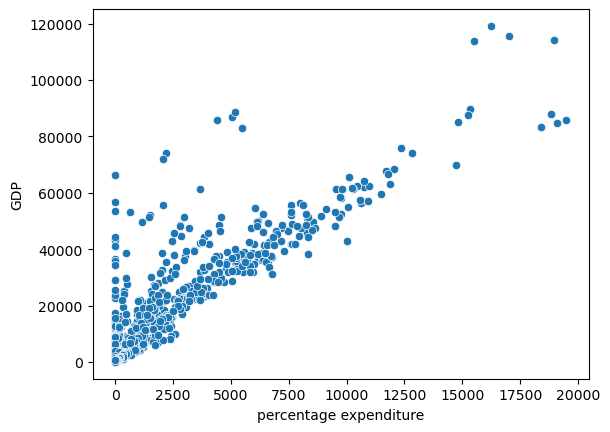

In [115]:
sns.scatterplot(x=data['percentage expenditure'],y=data['GDP']);

In [117]:
def impute_GDP(c):
    g=c[0]
    p=c[1]
    if pd.isnull(g):
        if p<=1250:
            return 1100.0
        elif 1250<p<=2500:
            return 1800.0
        elif 2500<p<=3750:
            return 2900.0
        elif 3750<p<=7500:
            return 3500.0
        elif 7500<p<=8750:
            return 4500.0
        elif 8750<p<=10000:
            return 5000.0
        elif 10000<p<=11250:
            return 5700.0
        elif 11250<p<=12500:
            return 7000.0
        elif 12500<p<=15000:
            return 8000.0
        elif 15000<p<=17500:
            return 9000.0
        elif p>17500:
            return 8500.0
    else:
        return g
    
data['GDP']=data[['GDP','percentage expenditure']].apply(impute_GDP,axis=1)

C:\Users\paart\AppData\Local\Temp\ipykernel_2672\1852343701.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  g=c[0]
C:\Users\paart\AppData\Local\Temp\ipykernel_2672\1852343701.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p=c[1]


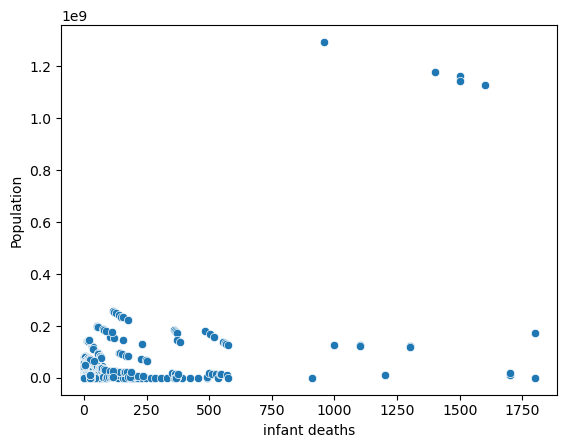

In [119]:
sns.scatterplot(x=data['infant deaths'],y=data['Population']);

In [121]:
def impute_population(c):
    p=c[0]
    i=c[1]
    if pd.isnull(p):
        if i<=100:
            return 0.19*((10)**9)
        elif 100<i<=250:
            return 0.18*((10)**9)
        elif 250<i<=350:
            return 0.02*((10)**9)
        elif 350<i<=900:
            return 0.1*((10)**9)
        elif 900<i<=1100:
            return 0.18*((10)**9)
        elif 1100<i<=1250:
            return 0.05*((10)**9)
        elif 1250<i<=1500:
            return 0.19*((10)**9)
        elif 1500<i<=1750:
            return 0.05*((10)**9)
        elif i>1750:
            return 0.1*((10)**9)
    else:
        return p
    
data['Population']=data[['Population','infant deaths']].apply(impute_population,axis=1)

C:\Users\paart\AppData\Local\Temp\ipykernel_2672\1801511516.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p=c[0]
C:\Users\paart\AppData\Local\Temp\ipykernel_2672\1801511516.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  i=c[1]


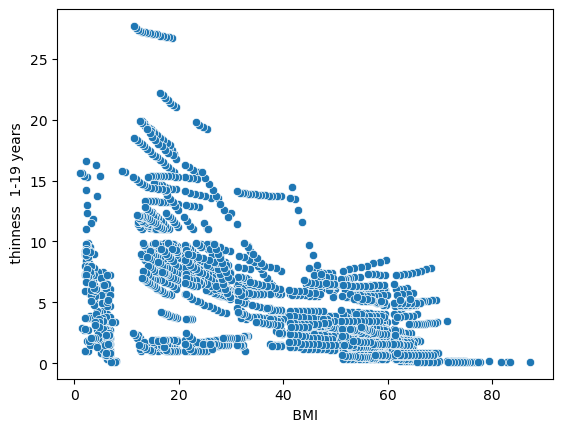

In [123]:
sns.scatterplot(x=data[' BMI '],y=data[' thinness  1-19 years']);

In [125]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 5.0
        elif 10<b<=20:
            return 10.0
        elif 20<b<=30:
            return 8.0
        elif 30<b<=40:
            return 6.0
        elif 40<b<=50:
            return 3.0
        elif 50<b<=70:
            return 4.0
        elif b>70:
            return 1.0
    else:
        return t
    
data[' thinness  1-19 years']=data[[' thinness  1-19 years',' BMI ']].apply(impute_Thin_1,axis=1)

C:\Users\paart\AppData\Local\Temp\ipykernel_2672\2047189121.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t=c[0]
C:\Users\paart\AppData\Local\Temp\ipykernel_2672\2047189121.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b=c[1]


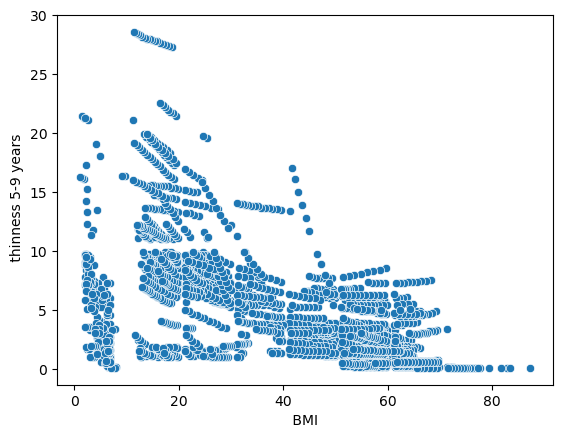

In [127]:
sns.scatterplot(x=data[' BMI '],y=data[' thinness 5-9 years']);

In [129]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 5.0
        elif 10<b<=20:
            return 10.0
        elif 20<b<=30:
            return 8.0
        elif 30<b<=40:
            return 6.0
        elif 40<b<=50:
            return 3.0
        elif 50<b<=70:
            return 4.0
        elif b>70:
            return 1.0
    else:
        return t
    
data[' thinness 5-9 years']=data[[' thinness 5-9 years',' BMI ']].apply(impute_Thin_1,axis=1)

C:\Users\paart\AppData\Local\Temp\ipykernel_2672\1741289322.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t=c[0]
C:\Users\paart\AppData\Local\Temp\ipykernel_2672\1741289322.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b=c[1]


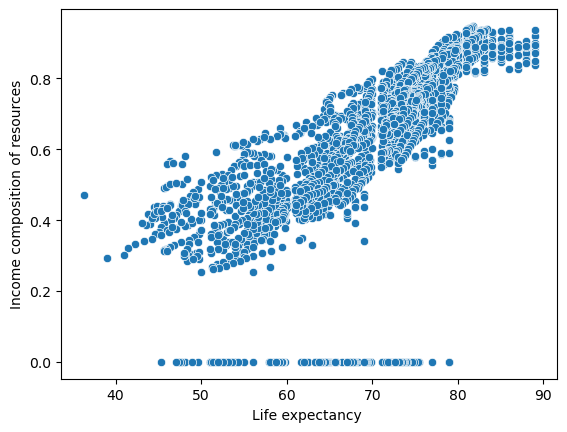

In [131]:
sns.scatterplot(x=data['Life expectancy '],y=data['Income composition of resources']);

In [133]:
def impute_Income(c):
    i=c[0]
    l=c[1]
    if pd.isnull(i):
        if l<=40:
            return 0.4
        elif 40<l<=50:
            return 0.42
        elif 50<l<=60:
            return 0.402
        elif 60<l<=70:
            return 0.54
        elif 70<l<=80:
            return 0.71
        elif l>80:
            return 0.88
    else:
        return i
        
data['Income composition of resources']=data[['Income composition of resources','Life expectancy ']].apply(impute_Income,axis=1)   

C:\Users\paart\AppData\Local\Temp\ipykernel_2672\1345374470.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  i=c[0]
C:\Users\paart\AppData\Local\Temp\ipykernel_2672\1345374470.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  l=c[1]


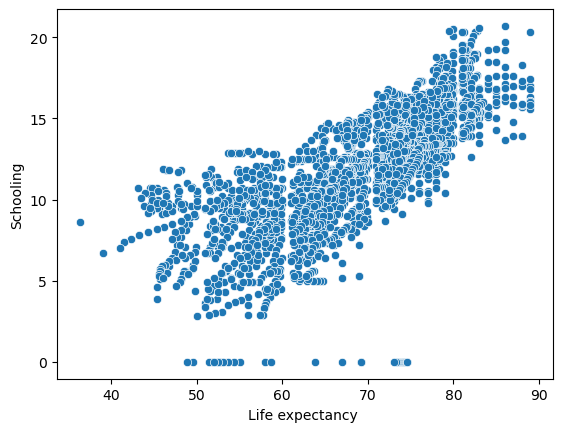

In [135]:
sns.scatterplot(x=data['Life expectancy '],y=data['Schooling']);

In [137]:
def impute_schooling(c):
    s=c[0]
    l=c[1]
    if pd.isnull(s):
        if l<= 40:
            return 8.0
        elif 40<l<=44:
            return 7.5
        elif 44<l<50:
            return 8.1
        elif 50<l<=60:
            return 8.2
        elif 60<l<=70:
            return 10.5
        elif 70<l<=80:
            return 13.4
        elif l>80:
            return 16.5
    else:
        return s
    
data['Schooling']=data[['Schooling','Life expectancy ']].apply(impute_schooling,axis=1)

C:\Users\paart\AppData\Local\Temp\ipykernel_2672\1134266768.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s=c[0]
C:\Users\paart\AppData\Local\Temp\ipykernel_2672\1134266768.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  l=c[1]


In [141]:
null_df = data.isnull().sum().reset_index()
null_df.columns = ['Feature name', 'no. of Nan']
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,0
9,Measles,0


## Model Training

In [144]:
y=data['Life expectancy ']

C:\Users\paart\AppData\Local\Temp\ipykernel_2672\717811492.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y);
C:\Users\paart\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


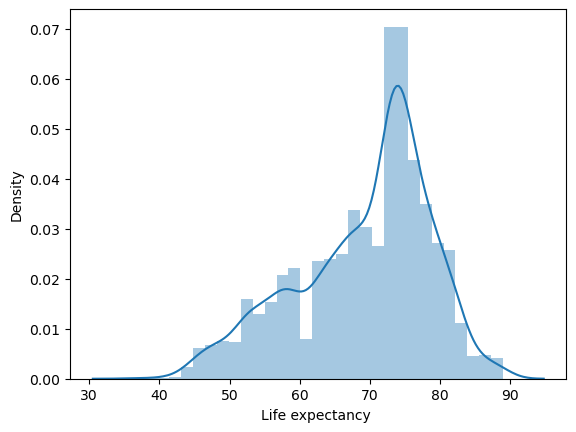

In [146]:
sns.distplot(y);

In [148]:
X=data.drop('Life expectancy ',axis=1)

In [150]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Adult Mortality                  2938 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2938 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2938 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2938 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2938 non-null   float64
 12  Total expenditure   

In [154]:
X['Country'].nunique()

193

In [156]:
Country_dummy=pd.get_dummies(X['Country'])

In [158]:
X['Status'].nunique()

2

In [160]:
status_dummy=pd.get_dummies(X['Status'])

In [164]:
X.drop(['Country','Status'],inplace=True,axis=1)
X=pd.concat([X,Country_dummy,status_dummy],axis=1)

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 69)

In [170]:
from sklearn.linear_model import LinearRegression

In [180]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [182]:
pred = model.predict(X_test)

In [186]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [190]:
mean_squared_error(y_test,pred)

3.9385204430687653

In [192]:
r2_score(y_test,pred)

0.9535172563731138